In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

Загружаем два датасета и удаляем столбцы с индексами

In [2]:
df1=pd.read_excel('Датасет для ВКР_композиты\X_bp.xlsx')
df1=df1.drop(['Unnamed: 0'], axis=1)
df1.shape

(1023, 10)

In [3]:
df1.head(2)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.0,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.0,23.750000,284.615385,210.0,70.0,3000.0,220.0


In [4]:
df2=pd.read_excel('Датасет для ВКР_композиты\X_nup.xlsx')
df2=df2.drop(['Unnamed: 0'], axis=1)
df2.shape

(1040, 3)

In [5]:
df2.head(2)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,4.0,57.0
1,0.0,4.0,60.0


Объединим датасеты по индексу по типу INNER

In [6]:
df = df1.merge(df2, left_index = True, right_index = True, how = 'inner')
df.head().T

,0,1,2,3,4
Соотношение матрица-наполнитель,1.857143,1.857143,1.857143,1.857143,2.771331
"Плотность, кг/м3",2030.000000,2030.000000,2030.000000,2030.000000,2030.000000
"модуль упругости, ГПа",738.736842,738.736842,738.736842,738.736842,753.000000
"Количество отвердителя, м.%",30.000000,50.000000,49.900000,129.000000,111.860000
"Содержание эпоксидных групп,%_2",22.267857,23.750000,33.000000,21.250000,22.267857
"Температура вспышки, С_2",100.000000,284.615385,284.615385,300.000000,284.615385
"Поверхностная плотность, г/м2",210.000000,210.000000,210.000000,210.000000,210.000000
"Модуль упругости при растяжении, ГПа",70.000000,70.000000,70.000000,70.000000,70.000000
"Прочность при растяжении, МПа",3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
"Потребление смолы, г/м2",220.000000,220.000000,220.000000,220.000000,220.000000


Посмотрим на типы данных и отсутсвующие значения.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки      

Все данные имеют тип float64, пропущенных значений нет.

Поиск дубликатов

In [8]:
df.duplicated().sum()

0

Дубликатов нет.

### Разведочный анализ данных. 
Необходимо нарисовать гистограммы распределения каждой из переменной,
диаграммы ящика с усами, попарные графики рассеяния точек. Необходимо также для каждой колонке получить среднее, 
медианное значение, провести анализ и исключение выбросов, проверить наличие пропусков.

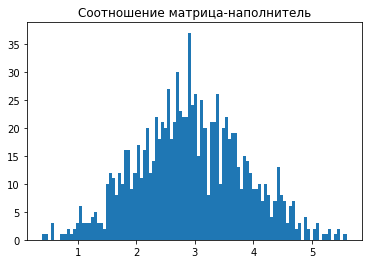

In [9]:
plt.hist(df['Соотношение матрица-наполнитель'], bins = 100);
plt.title('Соотношение матрица-наполнитель');

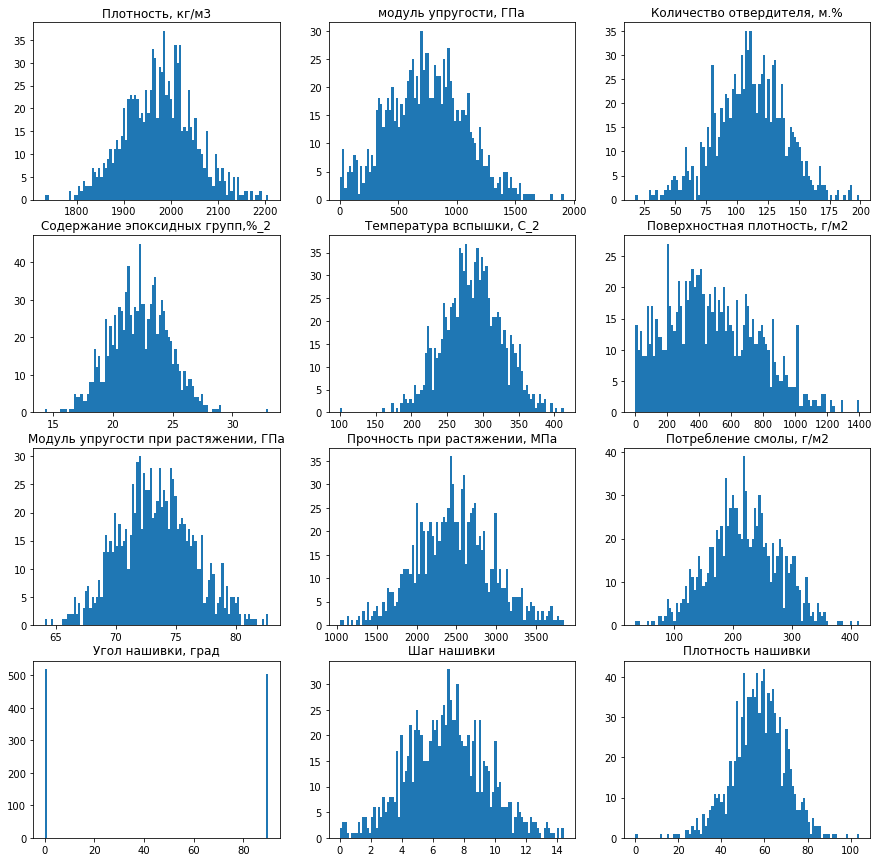

In [10]:
col_matr=np.array([['Плотность, кг/м3', 'модуль упругости, ГПа',  'Количество отвердителя, м.%'], 
                   ['Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 'Поверхностная плотность, г/м2'], 
                   ['Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа', 'Потребление смолы, г/м2'],
                  ['Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки']])

fig, axs = plt.subplots(4, 3, figsize=(15, 15))
for i in range(4):
    for j in range(3):
        axs[i, j].hist(df[col_matr[i][j]], bins = 100)
        axs[i, j].set_title(col_matr[i][j])

### Диаграммы рассеяния

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1209: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


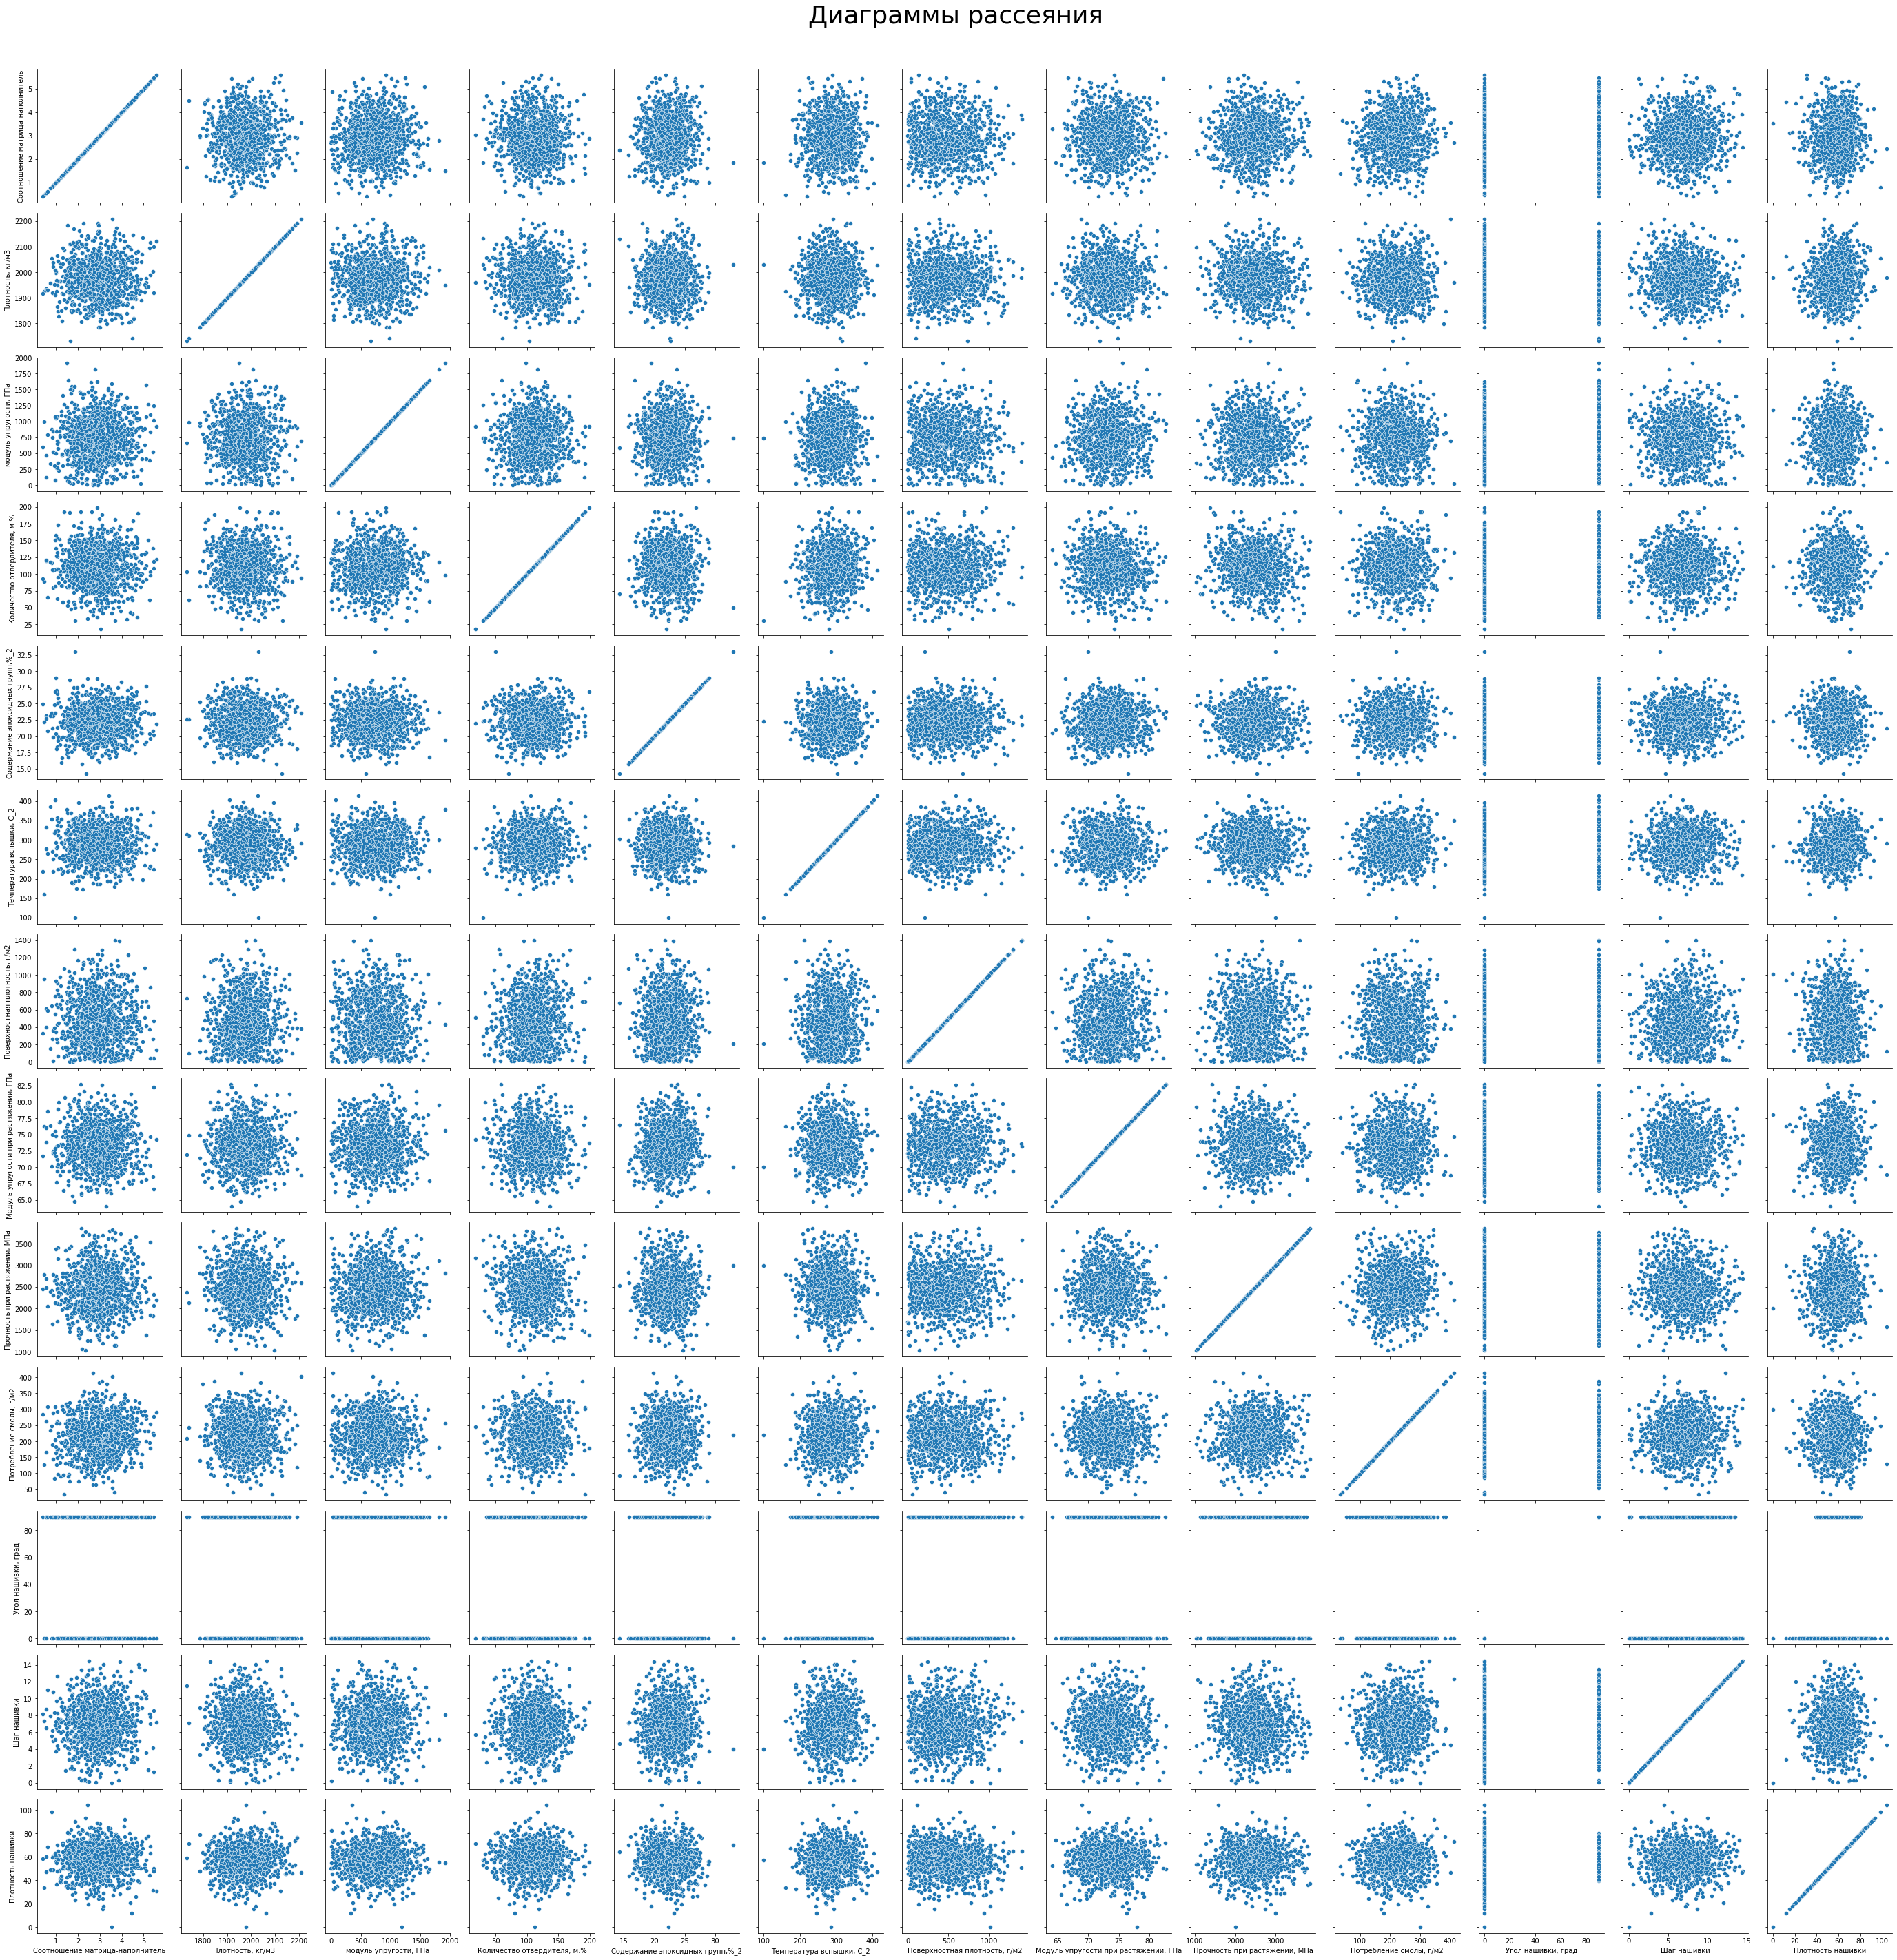

In [11]:
grid = sns.PairGrid(data = df, size = 3)
grid.map(sns.scatterplot)
plt.suptitle('Диаграммы рассеяния', size = 36, y = 1.02);

In [12]:
for x in df:
    print(f'{x}: среднее = {df[x].mean()}, медиана = {df[x].median()}')

Соотношение матрица-наполнитель: среднее = 2.9303657734325506, медиана = 2.90687765033521
Плотность, кг/м3: среднее = 1975.7348881101548, медиана = 1977.62165679058
модуль упругости, ГПа: среднее = 739.9232327560719, медиана = 739.664327697792
Количество отвердителя, м.%: среднее = 110.57076864736258, медиана = 110.564839894065
Содержание эпоксидных групп,%_2: среднее = 22.24438954776772, медиана = 22.2307437560244
Температура вспышки, С_2: среднее = 285.88215135162227, медиана = 285.896812331237
Поверхностная плотность, г/м2: среднее = 482.7318330384181, медиана = 451.86436518306
Модуль упругости при растяжении, ГПа: среднее = 73.32857125009073, медиана = 73.2688045943481
Прочность при растяжении, МПа: среднее = 2466.9228426979025, медиана = 2459.52452600309
Потребление смолы, г/м2: среднее = 218.42314367654265, медиана = 219.198882195134
Угол нашивки, град: среднее = 44.252199413489734, медиана = 0.0
Шаг нашивки: среднее = 6.899222077675024, медиана = 6.9161438559491
Плотность нашивк

Корреляционная матрица

<AxesSubplot:>

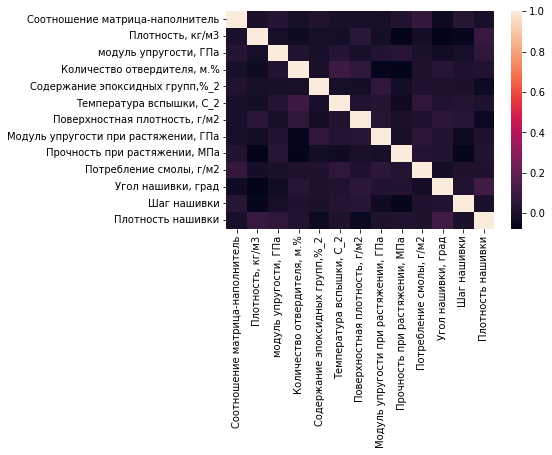

In [13]:
sns.heatmap(df.corr())

### Ящики с усами

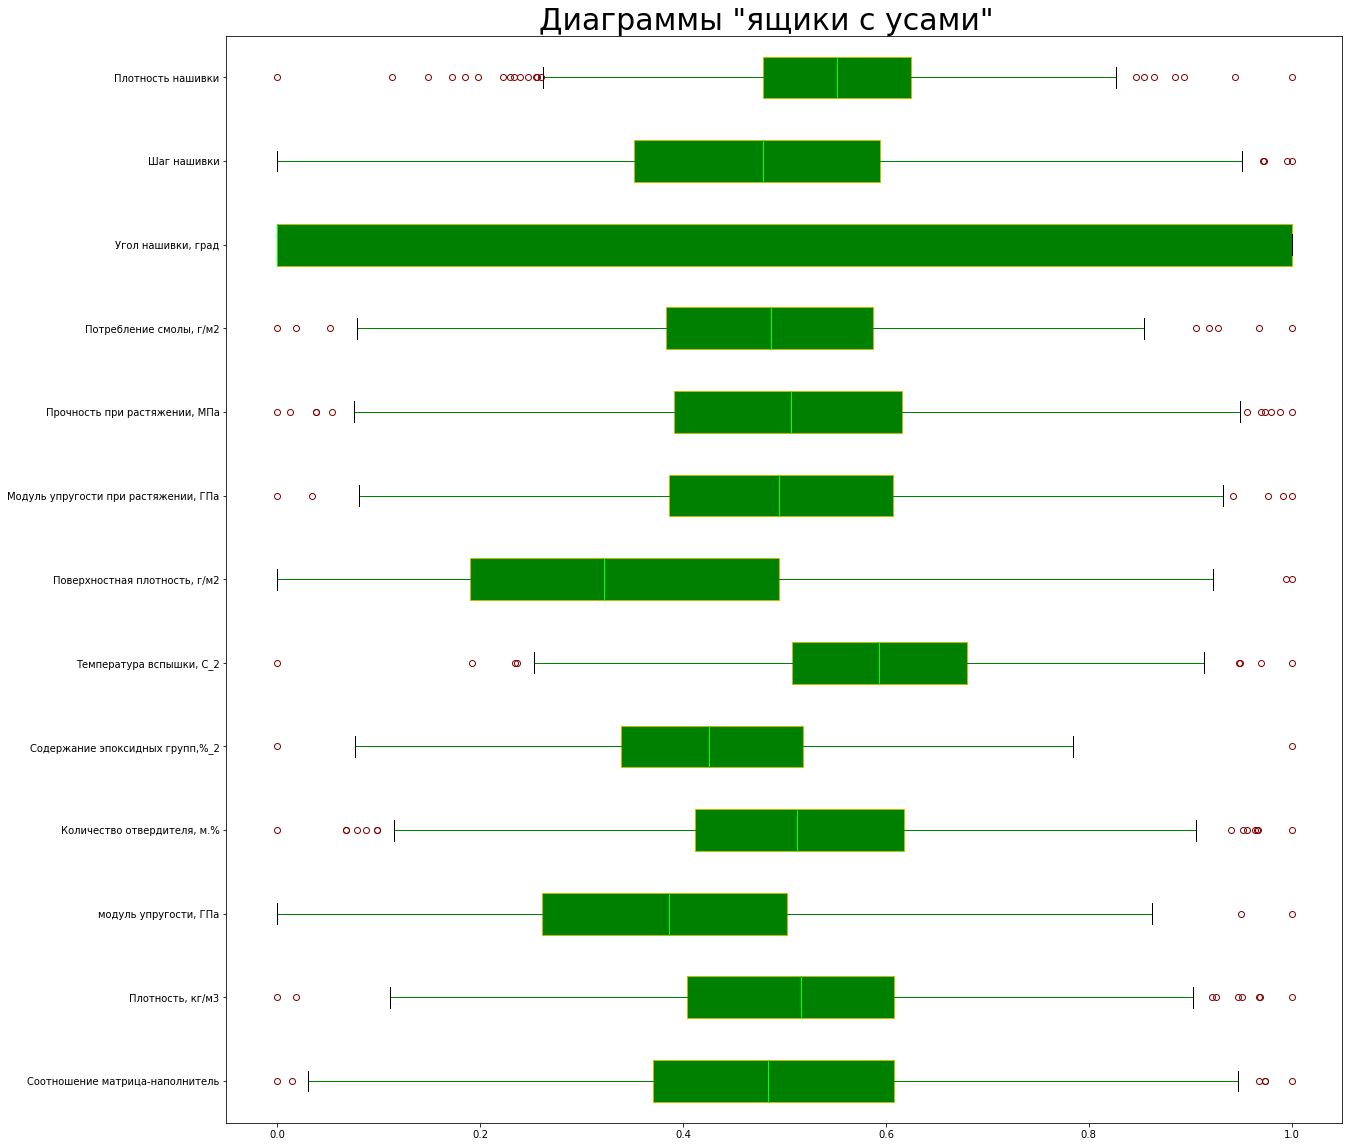

In [14]:
scaler = MinMaxScaler()
scaler.fit(df)
plt.figure(figsize = (20, 20))
plt.suptitle('Диаграммы "ящики с усами"', y = 0.9 ,
             fontsize = 30)
plt.boxplot(pd.DataFrame(scaler.transform(df)), labels = df.columns,patch_artist = True, meanline = True, vert = False, boxprops = dict(facecolor = 'g', color = 'y'),medianprops = dict(color = 'lime'), whiskerprops = dict(color="g"), capprops = dict(color = "black"), flierprops = dict(color = "y", markeredgecolor = "maroon"))
plt.show()

## Предобработка данных

### Удаление выбросов
Удалим выбросы с помощью интерквартильного размаха

In [15]:
df.shape

(1023, 13)

In [16]:
for i in df.drop(['Угол нашивки, град'], axis=1).columns:
    quart3, quart1 = np.percentile(df.loc[:,i], [75,25])
    max = quart3 + (1.5 * (quart3-quart1))
    min = quart1 - (1.5 * (quart3-quart1))
    df.loc[df[i] < min, i] = np.nan
    df.loc[df[i] > max, i] = np.nan

In [17]:
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           11
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

Удалим выбросы.

In [18]:
df=df.dropna()

In [19]:
df.shape

(936, 13)

## Обучение алгоритмов машинного обучения, которые будут определять значения:
-	Модуля упругости при растяжении, ГПа
-	Прочности при растяжении, МПа

In [20]:
# Импорт из библиотек машинного обучения
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

from xgboost import XGBRegressor

from autogluon.tabular import TabularPredictor

C:\Users\Kh_Al\AppData\Roaming\Python\Python39\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Тк задачу необходимо решать дважды для разных столбцов, напишем функцию

In [21]:
results1={}
results2={}

def choosen_target(target, results):
    X, X_test, y, y_test = train_test_split(df.drop([target], axis=1), df[target], test_size = 0.3, random_state = 1)
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(X)
    X = scaler.transform(X)
    X_test = scaler.transform(X_test)
    
    # Функция для обучения, прогноза. На выходе выдаёт ошибку
    # Кажется логичным использовать в качестве метрики mae
    def models(model):
        model.fit(X, y)
        pred=model.predict(X_test)
        return mean_absolute_error(pred, y_test)
    
    print(f'Задача регрессии для \"{target}\"')
    
    
    linreg=LinearRegression()
    err=models(linreg)
    print('Линейная регрессия, mae=', err)
    results.update({'Линейная регрессия': err})
    
    
    svm=SVR()
    err=models(svm)
    print('SVR, mae=', err)
    results.update({'SVR': err})
    
    knreg=KNeighborsRegressor()
    err=models(knreg)
    print('KNeighbors, mae=', err)
    results.update({'KNeighbors': err})
    
    randfor=RandomForestRegressor()
    err=models(randfor)
    print('RandomForest, mae=', err)
    results.update({'RandomForest': err})
    
    gradboost=GradientBoostingRegressor()
    err=models(gradboost)
    print('GradientBoosting(sklearn), mae=', err)
    results.update({'GradientBoosting(sklearn)': err})
    
    xgboost=XGBRegressor()
    err=models(xgboost)
    print('XGBoost, mae=', err)
    results.update({'XGBoost': err})

In [22]:
def fu_for_autogluon(target, results):
    df_train, df_test=train_test_split(df, test_size = 0.3, random_state = 1)
    predictor = TabularPredictor(label=target).fit(df_train)
    y_test = df_test[target]
    y_pred = predictor.predict(df_test.drop([target], axis=1))
    err=mean_absolute_error(y_pred, y_test)
    print('autogluon, mae=', err)
    results.update({'Autogluon': err})

### Определение значений модуля упругости при растяжении

In [23]:
choosen_target("Модуль упругости при растяжении, ГПа", results1)

Задача регрессии для "Модуль упругости при растяжении, ГПа"
Линейная регрессия, mae= 2.5464192980820095
SVR, mae= 2.6116531333051856
KNeighbors, mae= 2.818761217799366
RandomForest, mae= 2.583101998138262
GradientBoosting(sklearn), mae= 2.6826562323291636
XGBoost, mae= 2.836931371656709


In [25]:
fu_for_autogluon("Модуль упругости при растяжении, ГПа", results1)

No path specified. Models will be saved in: "AutogluonModels/ag-20221219_083811\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221219_083811\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    655
Train Data Columns: 12
Label Column: Модуль упругости при растяжении, ГПа
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (81.4171259444738, 65.5533359100584, 73.33001, 3.02786)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2935.99 MB
	Train Data (Original)  Memory Usage

autogluon, mae= 2.5477529120587277


### Определение значений прочности при растяжении

In [26]:
choosen_target("Прочность при растяжении, МПа", results2)

Задача регрессии для "Прочность при растяжении, МПа"
Линейная регрессия, mae= 370.5426179675644
SVR, mae= 366.5975512794085
KNeighbors, mae= 405.2389030228364
RandomForest, mae= 381.5011082077813
GradientBoosting(sklearn), mae= 389.0308752157977
XGBoost, mae= 391.90658604954945


In [28]:
fu_for_autogluon("Прочность при растяжении, МПа", results2)

No path specified. Models will be saved in: "AutogluonModels/ag-20221219_083824\"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20221219_083824\"
AutoGluon Version:  0.5.2
Python Version:     3.9.12
Operating System:   Windows
Train Data Rows:    655
Train Data Columns: 12
Label Column: Прочность при растяжении, МПа
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (3705.67252336168, 1264.31068218031, 2481.26168, 466.91599)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2777.04 MB
	Train Data (Original)  Memory Usage: 0

autogluon, mae= 373.7778693276293


In [24]:
print(f'Среднее абсолютное отклонение {df["Модуль упругости при растяжении, ГПа"].mad()}')

Среднее абсолютное отклонение 2.4487129099420786


In [27]:
print(f'Среднее абсолютное отклонение {df["Прочность при растяжении, МПа"].mad()}')

Среднее абсолютное отклонение 368.6882107135672


## Нейронная сеть для рекомендаций соотношения матрица-наполнитель

In [29]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
import joblib

import warnings
warnings.filterwarnings('ignore')

In [30]:
X, X_test, y, y_test = train_test_split(df.drop(['Соотношение матрица-наполнитель'], axis=1), df['Соотношение матрица-наполнитель'], test_size = 0.3, random_state = 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [31]:
def create_model(lyrs=[32], act='softmax', opt='SGD', dr=0.1, activation='relu', loss='mae'):
    model = Sequential()
    model.add(Dense(lyrs[0], input_dim=X.shape[1], activation=act)) 
    for i in range(1,len(lyrs)):
        model.add(Dense(lyrs[i], activation=act))
    
    model.add(Dropout(dr))
    model.add(Dense(1, activation='sigmoid')) 
    
    model.compile(loss=loss, optimizer=opt)
 
    return model

In [32]:
def param_grid(params): 
    # сетка гиперпараметров
    grid = GridSearchCV(
    estimator=KerasRegressor(create_model, verbose=0),
    param_grid=params,
    scoring='neg_mean_absolute_error',
    cv=3,
    )
    
    grid_result = grid.fit(X, y)
    
    # Вывод результатов
    print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print(f'%{mean} ({stdev}) with: {param}')
    return grid_result.best_params_

In [33]:
# Задаём сетку гиперпараметров
batch_size = [4, 10, 20]
epochs = [10, 50, 100]
params = dict(batch_size=batch_size, epochs=epochs)
best_par1=param_grid(params)

Best: -1.9103791109685926 using {'batch_size': 4, 'epochs': 100}
%-2.01859201191165 (0.09471632650041152) with: {'batch_size': 4, 'epochs': 10}
%-1.9207558689939377 (0.09425494738770546) with: {'batch_size': 4, 'epochs': 50}
%-1.9103791109685926 (0.09425877972508699) with: {'batch_size': 4, 'epochs': 100}
%-2.1562986788576093 (0.10283041166060132) with: {'batch_size': 10, 'epochs': 10}
%-1.9560491576273604 (0.09401870910029175) with: {'batch_size': 10, 'epochs': 50}
%-1.9261213283846093 (0.09439165761530985) with: {'batch_size': 10, 'epochs': 100}
%-2.259555989270471 (0.10086515595504748) with: {'batch_size': 20, 'epochs': 10}
%-2.0174021368735704 (0.09527884619888671) with: {'batch_size': 20, 'epochs': 50}
%-1.9551605370078107 (0.09414782765758771) with: {'batch_size': 20, 'epochs': 100}


In [34]:
best_batch_size=best_par1['batch_size']
best_epoch=best_par1['epochs']
print(best_batch_size, best_epoch)

4 100


In [35]:
# Подбор алгоритма
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Nadam']
params = dict(opt=optimizer)

best_par2=param_grid(params)

Best: -2.3766761467148365 using {'opt': 'Nadam'}
%-2.3954506717119903 (0.08076023531408781) with: {'opt': 'SGD'}
%-2.379492422416883 (0.09721474817660415) with: {'opt': 'RMSprop'}
%-2.396764302524916 (0.10456022288577463) with: {'opt': 'Adagrad'}
%-2.3859952670397515 (0.09649507338903278) with: {'opt': 'Adadelta'}
%-2.3859343719314863 (0.09854471162792035) with: {'opt': 'Adam'}
%-2.3766761467148365 (0.10738574379602904) with: {'opt': 'Nadam'}


In [36]:
best_opt=best_par2['opt']
best_opt

'Nadam'

In [37]:
# Подбор количества слоёв
layers = [[8],[16, 4],[32, 8, 3],[12, 6, 3], [64, 64, 3], [128, 64, 16, 3]]
params = dict(lyrs=layers)

best_par3=param_grid(params)

Best: -2.3103346584295963 using {'lyrs': [32, 8, 3]}
%-2.36899203441156 (0.14403684026082578) with: {'lyrs': [8]}
%-2.3941509677559503 (0.097155898228317) with: {'lyrs': [16, 4]}
%-2.3103346584295963 (0.08746972300570104) with: {'lyrs': [32, 8, 3]}
%-2.4093847152941934 (0.11214070838840128) with: {'lyrs': [12, 6, 3]}
%-2.3656627961124728 (0.10851669552252266) with: {'lyrs': [64, 64, 3]}
%-2.336512878087543 (0.09945126146831842) with: {'lyrs': [128, 64, 16, 3]}


In [38]:
best_lyrs=best_par3['lyrs']
best_lyrs

[32, 8, 3]

In [39]:
# Подбор функций активации
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
params = dict(act=activation)

best_par4=param_grid(params)

Best: -2.1922896590807297 using {'act': 'tanh'}
%-2.382313181642434 (0.08965592684576597) with: {'act': 'softmax'}
%-2.4284352648234977 (0.17509183754511712) with: {'act': 'softplus'}
%-2.325618332085463 (0.10707576736580801) with: {'act': 'softsign'}
%-2.3355005909519617 (0.14729043702436748) with: {'act': 'relu'}
%-2.1922896590807297 (0.10125901945117893) with: {'act': 'tanh'}
%-2.276170540645278 (0.0497349537467221) with: {'act': 'sigmoid'}
%-2.422794507640799 (0.28517320596422835) with: {'act': 'hard_sigmoid'}
%-2.366322248657973 (0.23878666732656767) with: {'act': 'linear'}


In [40]:
best_act=best_par4['act']
best_act

'tanh'

In [41]:
# Подбор dropout-ов
drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
params = dict(dr=drops)

best_par5=param_grid(params)

Best: -2.373900263444138 using {'dr': 0.01}
%-2.379013367280565 (0.0911596546149958) with: {'dr': 0.0}
%-2.373900263444138 (0.09636129989722174) with: {'dr': 0.01}
%-2.387067861636883 (0.08532723942541277) with: {'dr': 0.05}
%-2.388098369576657 (0.09050262393487896) with: {'dr': 0.1}
%-2.388501609179771 (0.08853029451479073) with: {'dr': 0.2}
%-2.3815952924556814 (0.09124012705798942) with: {'dr': 0.3}
%-2.3831509343617583 (0.09660255112475272) with: {'dr': 0.5}


In [42]:
best_dr=best_par5['dr']

In [43]:
# Выбранные параметры для нейросети
print(f'Слои: {best_lyrs}')
print(f'Dropout: {best_dr}')
print(f'Функция активации: {best_act}')
print(f'Количество эпох: {best_epoch}')
print(f'Размер батча: {best_batch_size}')
print(f'best optimizer: {best_opt}')

Слои: [32, 8, 3]
Dropout: 0.01
Функция активации: tanh
Количество эпох: 100
Размер батча: 4
best optimizer: Nadam


In [44]:
# построение окончательной модели
model = create_model(lyrs=best_lyrs, dr=best_dr, opt=best_opt, act=best_act)

print(model.summary())

Model: "sequential_113"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_258 (Dense)           (None, 32)                416       
                                                                 
 dense_259 (Dense)           (None, 8)                 264       
                                                                 
 dense_260 (Dense)           (None, 3)                 27        
                                                                 
 dropout_113 (Dropout)       (None, 3)                 0         
                                                                 
 dense_261 (Dense)           (None, 1)                 4         
                                                                 
Total params: 711
Trainable params: 711
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
# обучаем нейросеть
model_hist = model.fit(X, 
    y, 
    epochs = best_epoch,
    batch_size=best_batch_size,
    verbose = 1, 
    validation_split = 0.2)

Epoch 1/100
131/131 [==============================] - 1s 3ms/step - loss: 2.1720 - val_loss: 2.2221
Epoch 2/100
131/131 [==============================] - 0s 2ms/step - loss: 2.0342 - val_loss: 2.1515
Epoch 3/100
131/131 [==============================] - 0s 2ms/step - loss: 1.9822 - val_loss: 2.1121
Epoch 4/100
131/131 [==============================] - 0s 2ms/step - loss: 1.9523 - val_loss: 2.0875
Epoch 5/100
131/131 [==============================] - 0s 2ms/step - loss: 1.9325 - val_loss: 2.0713
Epoch 6/100
131/131 [==============================] - 0s 2ms/step - loss: 1.9191 - val_loss: 2.0601
Epoch 7/100
131/131 [==============================] - 0s 2ms/step - loss: 1.9100 - val_loss: 2.0519
Epoch 8/100
131/131 [==============================] - 0s 2ms/step - loss: 1.9034 - val_loss: 2.0458
Epoch 9/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8978 - val_loss: 2.0412
Epoch 10/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8938 - val_lo

131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 82/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 83/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 84/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 85/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8718 - val_loss: 2.0171
Epoch 86/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 87/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 88/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 89/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8719 - val_loss: 2.0171
Epoch 90/100
131/131 [==============================] - 0s 2ms/step - loss: 1.8718 - val_loss: 

In [46]:
# оценим модель. Результат mae для тестовой выборки
scores = model.evaluate(X_test, y_test)
scores

9/9 [==============================] - 0s 6ms/step - loss: 1.9987


1.9986572265625

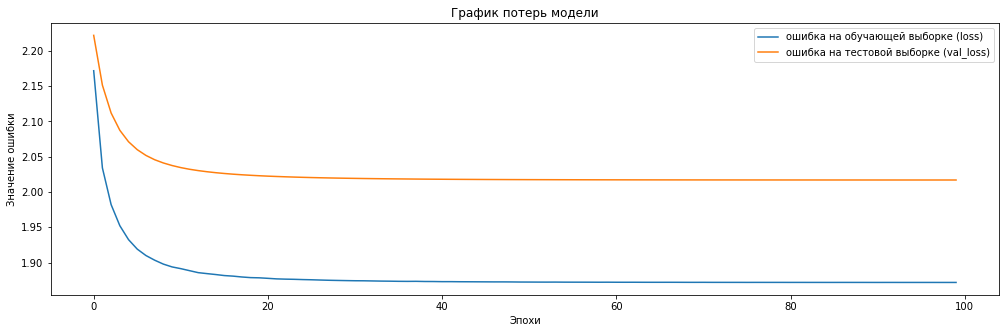

In [47]:
# Посмотрим на график потерь на тренировочной и тестовой выборках
def model_loss_plot(model_hist):
    plt.figure(figsize = (17,5))
    plt.plot(model_hist.history['loss'],
             label = 'ошибка на обучающей выборке (loss)')
    plt.plot(model_hist.history['val_loss'],
            label = 'ошибка на тестовой выборке (val_loss)')
    plt.title('График потерь модели')
    plt.ylabel('Значение ошибки')
    plt.xlabel('Эпохи')
    plt.legend()
    plt.show()
model_loss_plot(model_hist)

In [48]:
model.save('saved_model/my_model')

In [49]:
joblib.dump(scaler, "scaler") 

['scaler']